In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap as bm
import xarray as xr

see: 
    
[http://ensembles-eu.metoffice.com/C3S-DR/pages/c3sdr_workshops_tools.html#tool6](http://ensembles-eu.metoffice.com/C3S-DR/pages/c3sdr_workshops_tools.html#tool6)

and 

[http://www.climdex.org/indices.html](http://www.climdex.org/indices.html)

and 

[http://etccdi.pacificclimate.org/software.shtml](http://etccdi.pacificclimate.org/software.shtml)

In [18]:
data = pd.read_table("http://ensembles-eu.metoffice.com/C3S-DR/pages/workshop_tools/lugano.txt", header=None, na_values=[-99.9])

In [19]:
data.index = pd.to_datetime(pd.DataFrame(data.iloc[:,0:3].values, columns = ['year','month','day']))

In [21]:
data = data.drop([0,1,2], axis=1)

In [23]:
data.columns = ['rain','tmax','tmin']

In [28]:
data.query('tmax < tmin')

0

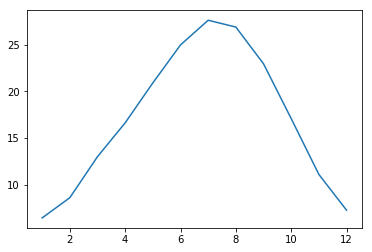

In [33]:
data.tmax.groupby(data.index.month).mean().plot()

In [37]:
def count_max(x, thresh=25): 
    return (x > thresh).sum()

In [41]:
def FD(x, thresh=0): 
    return (x < thresh).sum()

In [50]:
FDs = data.loc[:,['tmin']].groupby(data.index.year).apply(FD)

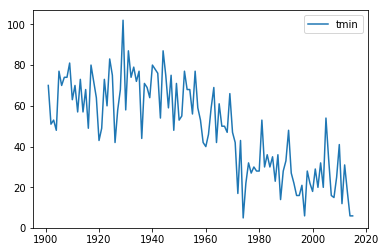

In [51]:
FDs.plot()

In [46]:
import pymc3 as pm

In [118]:
FDs.tail()

,tmin,x,y
2011,12,2011,12
2012,31,2012,31
2013,18,2013,18
2014,6,2014,6
2015,6,2015,6


In [71]:
x = FDs.x.values

In [73]:
y = FDs.y.values

In [98]:
niter = 5000
with pm.Model() as linreg:
    a = pm.Normal('a', mu=0, sd=100)
    b = pm.Normal('b', mu=0, sd=100)
    sigma = pm.HalfNormal('sigma', sd=1)

    y_est = a*x + b
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)

    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace = pm.sample(niter, step, start, random_seed=123)

Optimization terminated successfully.
         Current function value: 588.279294

100%|██████████| 5000/5000 [00:50<00:00, 98.93it/s] 


         Iterations: 39
         Function evaluations: 51
         Gradient evaluations: 51


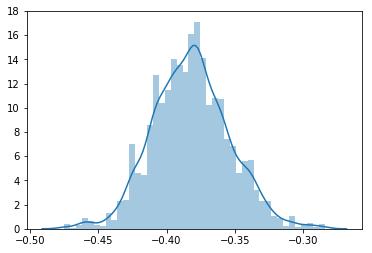

In [104]:
sns.distplot(trace['a'][100:])

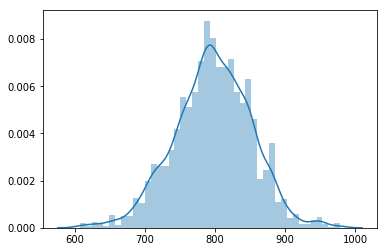

In [105]:
sns.distplot(trace['b'][100:])